In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
data  = pd.read_csv("housing.csv")

In [3]:
data 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


We want to predict the median house value

check for any null values 

data.info()

total_bedrooms has missing values 

In [4]:
data.dropna(inplace=True) # takes data, drops nan values and saves 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


Next we're going to split the data into training and testing data

In [6]:
from sklearn.model_selection import train_test_split

x = data.drop(['median_house_value'], axis=1 ) 
y = data['median_house_value']

In [7]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [8]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) # reserving 20% for testing 

In [10]:
train_data = x_train.join(y_train)

### Combined dataframe for the training data

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1949,-120.86,38.75,15.0,1533.0,300.0,674.0,287.0,2.5625,INLAND,146100.0
7425,-118.21,33.95,43.0,1500.0,419.0,1726.0,440.0,1.8641,<1H OCEAN,165100.0
19879,-119.28,36.35,7.0,3598.0,701.0,2080.0,678.0,3.1111,INLAND,72400.0
3123,-118.00,35.05,21.0,1739.0,425.0,945.0,362.0,3.4015,INLAND,86500.0
16634,-120.84,35.31,23.0,3100.0,603.0,1515.0,609.0,2.8493,NEAR OCEAN,196100.0
...,...,...,...,...,...,...,...,...,...,...
3143,-118.16,35.05,44.0,1297.0,307.0,776.0,278.0,2.5875,INLAND,68900.0
10672,-117.85,33.61,14.0,4340.0,741.0,1505.0,670.0,7.5674,<1H OCEAN,500001.0
6801,-118.13,34.09,42.0,700.0,212.0,662.0,210.0,3.0078,<1H OCEAN,191700.0
3997,-118.61,34.17,19.0,5944.0,1345.0,2372.0,1250.0,3.8819,<1H OCEAN,328900.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

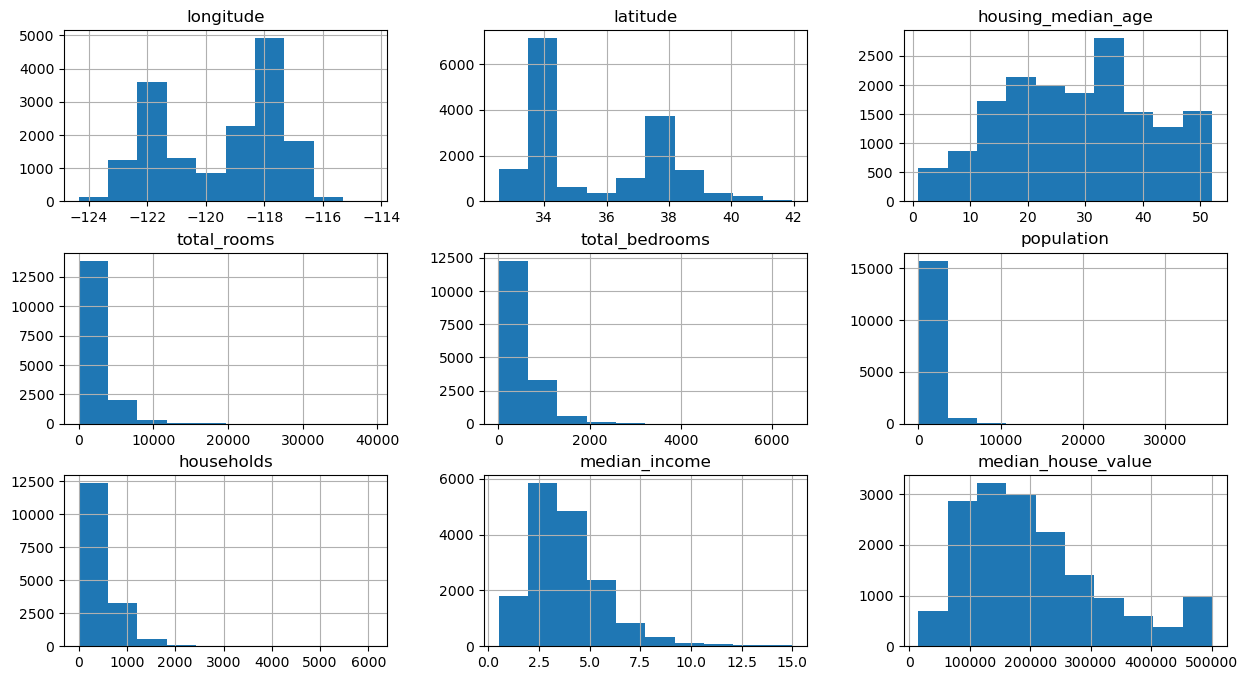

In [12]:
train_data.hist(figsize = (15, 8))


<AxesSubplot:>

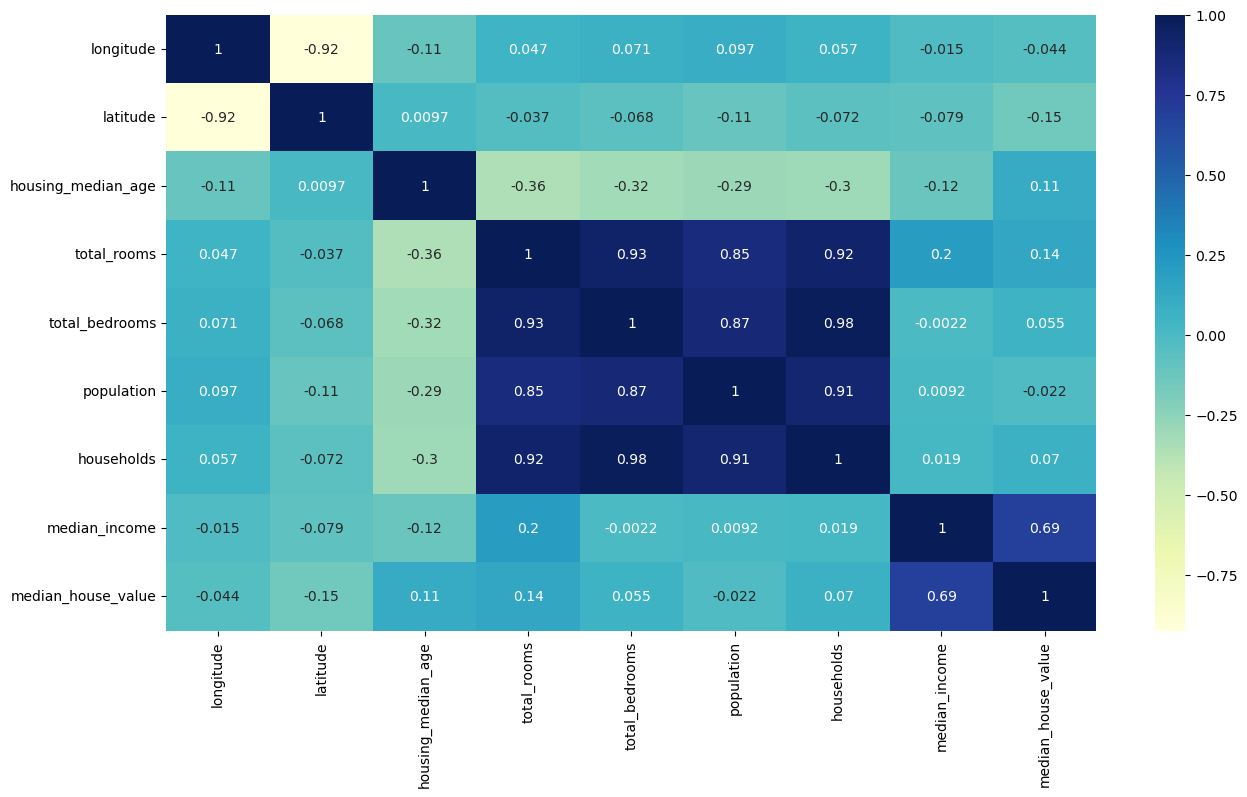

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap ='YlGnBu')

In [14]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] +1) #+1 to prevent zero values 
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

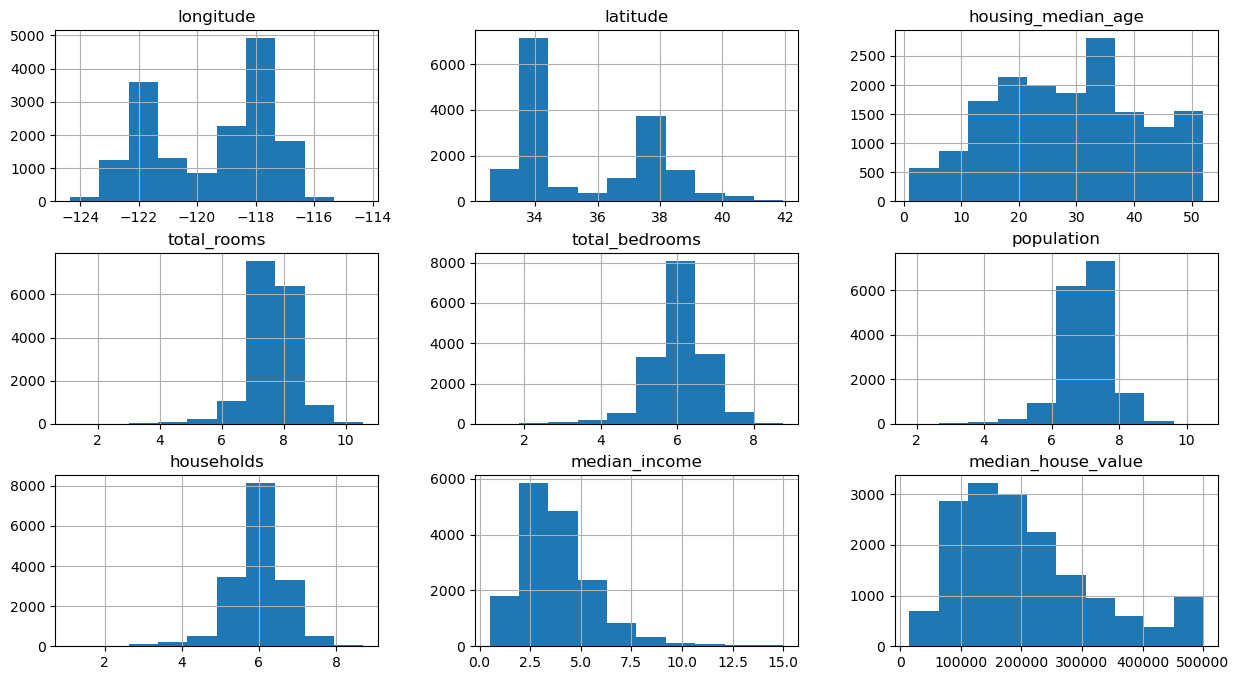

In [15]:
train_data.hist(figsize = (15,8)) 

### next we will turn ocean_proximity into numerical binary values asssuming inland will have lower values 

In [16]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7266
INLAND        5171
NEAR OCEAN    2108
NEAR BAY      1797
ISLAND           4
Name: ocean_proximity, dtype: int64

In [17]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)  # yes= 1 no=0

In [18]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
1949,-120.86,38.75,15.0,7.335634,5.707110,6.514713,5.662960,2.5625,146100.0,0,1,0,0,0
7425,-118.21,33.95,43.0,7.313887,6.040255,7.454141,6.089045,1.8641,165100.0,1,0,0,0,0
19879,-119.28,36.35,7.0,8.188411,6.553933,7.640604,6.520621,3.1111,72400.0,0,1,0,0,0
3123,-118.00,35.05,21.0,7.461640,6.054439,6.852243,5.894403,3.4015,86500.0,0,1,0,0,0
16634,-120.84,35.31,23.0,8.039480,6.403574,7.323831,6.413459,2.8493,196100.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,-118.16,35.05,44.0,7.168580,5.730100,6.655440,5.631212,2.5875,68900.0,0,1,0,0,0
10672,-117.85,33.61,14.0,8.375860,6.609349,7.317212,6.508769,7.5674,500001.0,1,0,0,0,0
6801,-118.13,34.09,42.0,6.552508,5.361292,6.496775,5.351858,3.0078,191700.0,1,0,0,0,0
3997,-118.61,34.17,19.0,8.690306,7.204893,7.771910,7.131699,3.8819,328900.0,1,0,0,0,0


<AxesSubplot:>

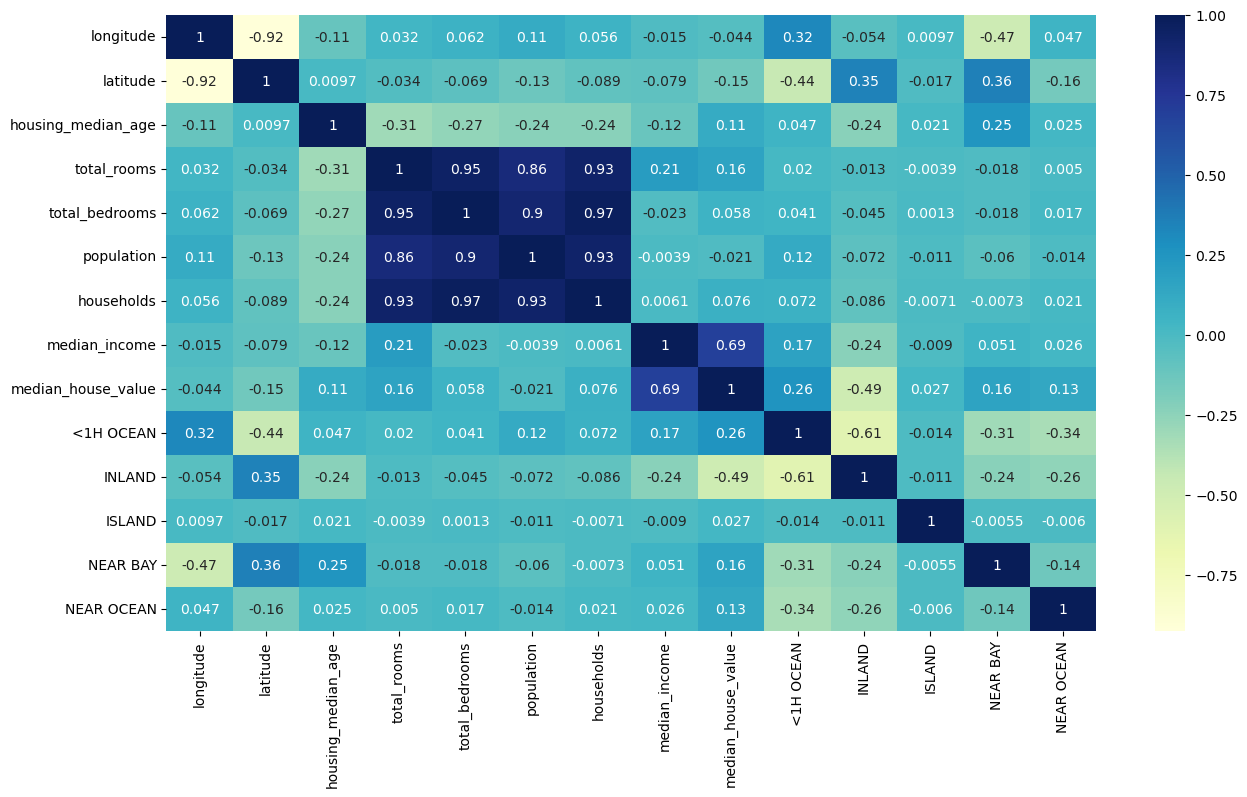

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap ='YlGnBu')

#### now we see that the median house value has a negative correlation with inland. So inland pays way less than near ocean. The opposite is true for less than 1h away from the ocean

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

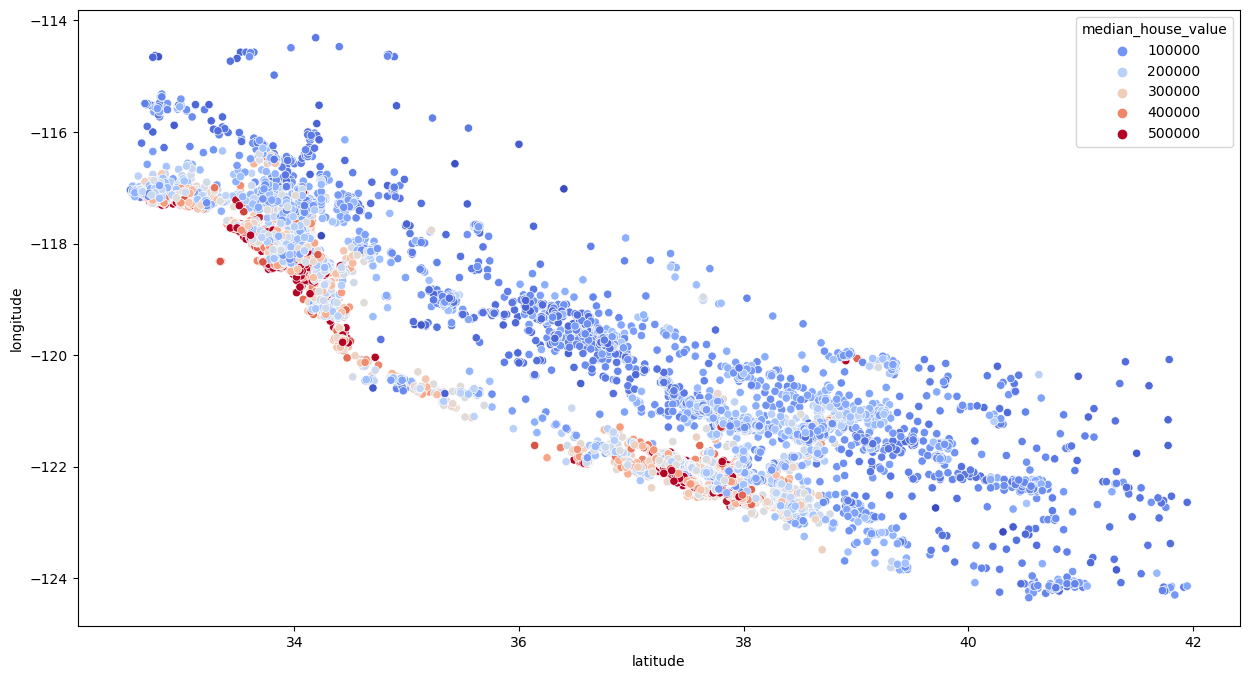

In [20]:
plt.figure(figsize= (15,8))
sns.scatterplot(x='latitude', y="longitude", data =train_data, hue="median_house_value", palette = 'coolwarm')

the more red it get, the more expensive the house is. The opposite is true for blue

as we can see, the closer to the coast a home is, the more expensive homes are

In [21]:
train_data['bedroom_ratio'] = train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data [ 'households']

<AxesSubplot:>

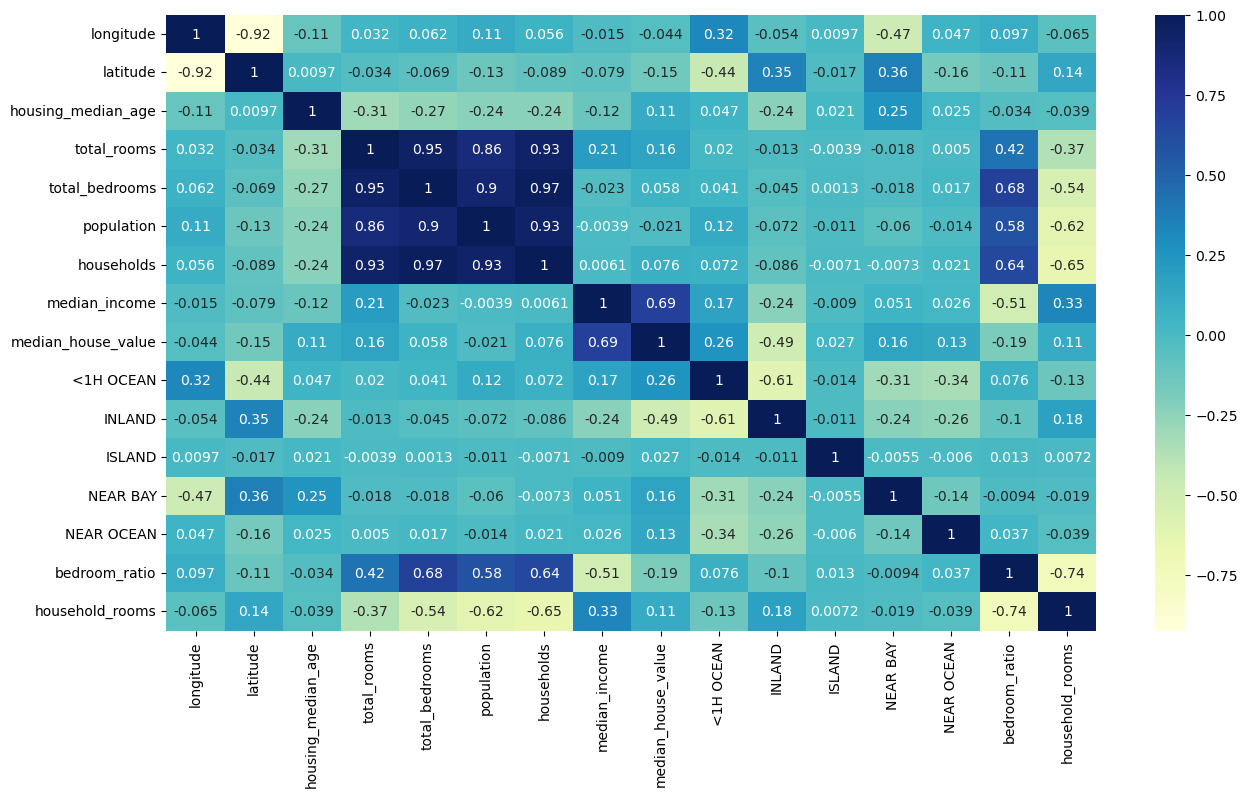

In [22]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True, cmap ='YlGnBu')

use linear regression to train multiple models 

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# split into x and y 

x_train, y_train = train_data.drop(['median_house_value'], axis =1), train_data['median_house_value']
x_train_s = scaler.fit_transform(x_train)

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression()

In [24]:
test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] +1) #+1 to prevent zero values 
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['households']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)  # yes= 1 no=0

test_data['bedroom_ratio'] = test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data [ 'households']




In [25]:
x_test, y_test = test_data.drop(['median_house_value'], axis =1), test_data['median_house_value']


In [26]:
x_test


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
20444,-118.90,34.30,13.0,8.629092,6.921658,8.067463,6.879356,5.5925,1,0,0,0,0,0.802131,1.254346
16072,-122.49,37.75,48.0,7.778211,6.052089,6.948897,6.013715,3.7562,0,0,0,0,1,0.778082,1.293412
20544,-121.76,38.55,23.0,9.082621,7.527256,8.753213,7.513709,2.0650,0,1,0,0,0,0.828754,1.208807
19217,-122.67,38.47,16.0,8.146999,6.674561,7.357556,6.595781,2.4722,1,0,0,0,0,0.819266,1.235183
5479,-118.45,34.00,48.0,7.562162,6.013715,7.041412,6.073045,4.5750,1,0,0,0,0,0.795238,1.245201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10161,-117.98,33.90,6.0,7.338238,5.852202,6.228511,5.638355,4.8264,1,0,0,0,0,0.797494,1.301486
11371,-117.98,33.71,26.0,7.552762,5.924256,7.002156,5.910797,4.8611,1,0,0,0,0,0.784383,1.277791
15419,-117.25,33.22,19.0,7.681560,6.095825,7.411556,6.077642,3.5000,1,0,0,0,0,0.793566,1.263905
1232,-120.36,38.21,10.0,8.366603,6.740519,7.300473,6.413459,2.8208,0,1,0,0,0,0.805646,1.304538


In [31]:
x_test_s = scaler.transform(x_test)

In [32]:
reg.score(x_test, y_test)

0.6688683353435803

# Random Forest progressor 

In [41]:
from sklearn.ensemble import RandomForestRegressor
    
forest = RandomForestRegressor()
forest.fit(x_train_s, y_train)

RandomForestRegressor()

In [43]:
forest.score(x_test_s, y_test)

0.8178783445818819

81% now 